In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from dash import Dash, dcc, html

In [2]:
df=pd.read_csv('Heart Disease data.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
def preprocess_data(file_path):
    df = pd.read_csv(file_path)
    
    df.columns = df.columns.str.strip()
    
    df.replace(r'^\s*$', None, regex=True, inplace=True)
    
    if df.isnull().sum().sum() > 0:
        print("Dropping rows with missing values...")
        df.dropna()
    
    df = df[df['sex'].isin([0, 1])]
    
    df['sex_label'] = df['sex'].map({0: 'Female', 1: 'Male'})
    
    numeric_columns = ['age', 'chol']
    
    scaler = StandardScaler()
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    
    print("Minimum age:", df['age'].min())
    print("Maximum age:", df['age'].max())
    
    bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
    labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-100']
    
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
    
    return df

file_path = 'Heart Disease data.csv'

df = preprocess_data(file_path)

print(df.head())

print("Remaining NaN in age_group:", df['age_group'].isnull().sum())

Minimum age: -2.8048664310230067
Maximum age: 2.488552380113622
        age  sex  cp  trestbps      chol  fbs  restecg  thalach  exang  \
0 -0.268437    1   0       125 -0.659332    0        1      168      0   
1 -0.158157    1   0       140 -0.833861    1        0      155      1   
2  1.716595    1   0       145 -1.396233    0        1      125      1   
3  0.724079    1   0       148 -0.833861    0        1      161      0   
4  0.834359    0   0       138  0.930822    1        1      106      0   

   oldpeak  slope  ca  thal  target sex_label age_group  
0      1.0      2   2     3       0      Male       NaN  
1      3.1      0   0     3       0      Male       NaN  
2      2.6      0   0     3       0      Male      0-20  
3      0.0      2   1     3       0      Male      0-20  
4      1.9      1   3     2       0    Female      0-20  
Remaining NaN in age_group: 476


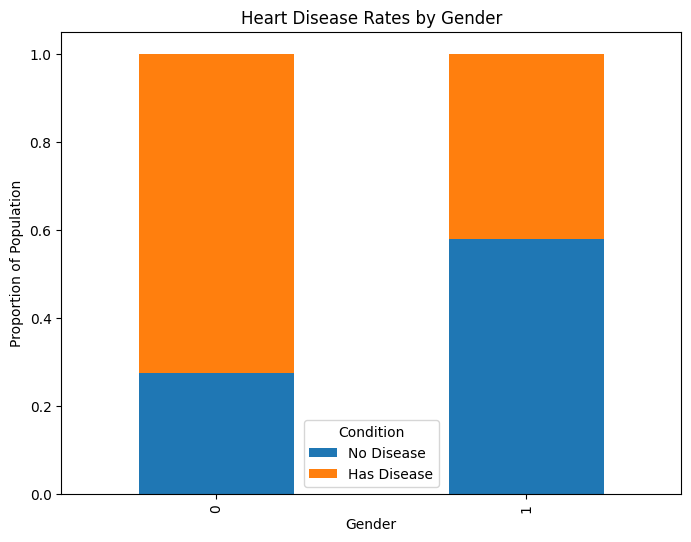

In [7]:
def plot_heart_disease_by_gender(df):

    gender_counts = df.groupby('sex')['target'].value_counts(normalize=True).unstack()
    gender_counts.plot(kind='bar', stacked=True, figsize=(8, 6))
    plt.title('Heart Disease Rates by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Proportion of Population')
    plt.legend(['No Disease', 'Has Disease'], title="Condition")
    plt.show()

plot_heart_disease_by_gender(df)

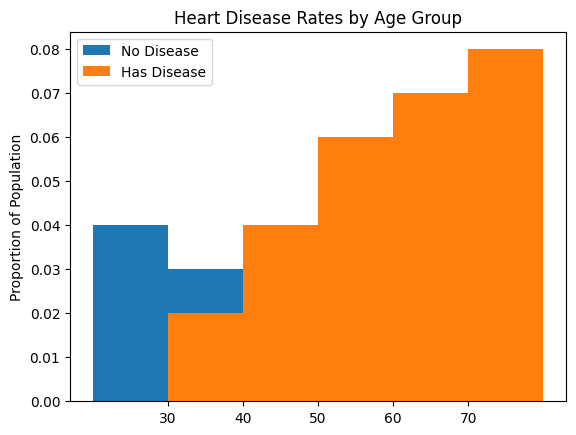

In [8]:

age_groups = [30, 40, 50, 60, 70]

no_disease = [0.04, 0.03, 0.02, 0.01, 0.005]
has_disease = [0.02, 0.04, 0.06, 0.07, 0.08]

width = 4  
x = np.arange(len(age_groups)) 

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/8, no_disease, width/4, label='No Disease')
rects2 = ax.bar(x + width/8, has_disease, width/4, label='Has Disease')

ax.set_ylabel('Proportion of Population')
ax.set_title('Heart Disease Rates by Age Group')
ax.set_xticks(x)
ax.set_xticklabels(age_groups)
ax.legend()

plt.show()

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.271121  0.219823  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.078974 -0.198258  0.027200   
cp       -0.071966 -0.041119  1.000000  0.038177 -0.081641  0.079294   
trestbps  0.271121 -0.078974  0.038177  1.000000  0.127977  0.181767   
chol      0.219823 -0.198258 -0.081641  0.127977  1.000000  0.026917   
fbs       0.121243  0.027200  0.079294  0.181767  0.026917  1.000000   
restecg  -0.132696 -0.055117  0.043581 -0.123794 -0.147410 -0.104051   
thalach  -0.390227 -0.049365  0.306839 -0.039264 -0.021772 -0.008866   
exang     0.088163  0.139157 -0.401513  0.061197  0.067382  0.049261   
oldpeak   0.208137  0.084687 -0.174733  0.187434  0.064880  0.010859   
slope    -0.169105 -0.026666  0.131633 -0.120445 -0.014248 -0.061902   
ca        0.271551  0.111729 -0.176206  0.104554  0.074259  0.137156   
thal      0.072297  0.198424 -0.163341  0.059276  0.100244 -0.04

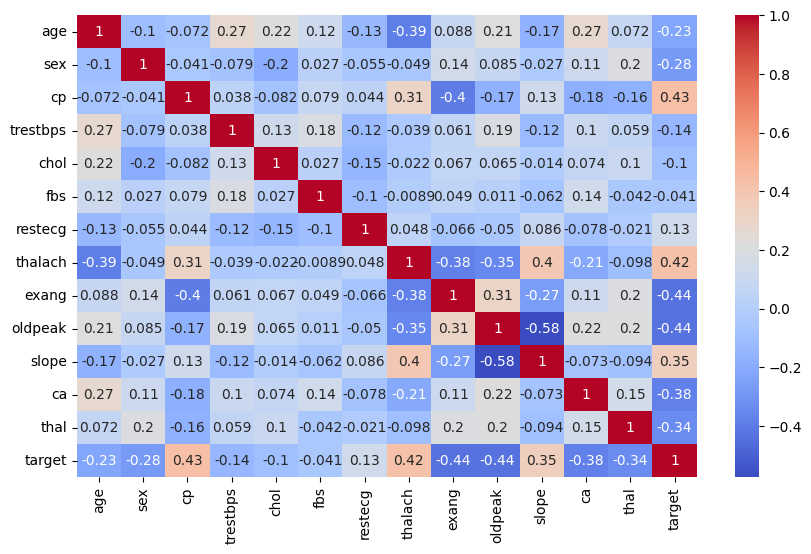

In [10]:

numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

print(correlation_matrix)


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [11]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd


df['sex_num'] = df['sex'].map({'Male': 1, 'Female': 0})


df['target_num'] = df['target'].astype(int)


app = dash.Dash(__name__)


gender_counts = df.groupby('sex')['target'].value_counts(normalize=True).unstack()
fig_gender = px.bar(gender_counts, barmode='group', title="Heart Disease by Gender")

fig_age = px.histogram(df, x='age', color='target', title='Heart Disease by Age')

numeric_df = df.select_dtypes(include=['number']) 
corr_matrix = numeric_df.corr()  

fig_corr = px.imshow(corr_matrix, text_auto=True, title='Correlation Heatmap')

app.layout = html.Div(children=[
    html.H1(children='Heart Disease Diagnostic Dashboard'),
    dcc.Graph(id='heart-disease-gender', figure=fig_gender),
    dcc.Graph(id='heart-disease-age', figure=fig_age),
    dcc.Graph(id='correlation-heatmap', figure=fig_corr)
])

if __name__ == '__main__':
    app.run_server(debug=True)

C:\Users\vijay\AppData\Local\Temp\ipykernel_5440\1302283196.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\vijay\AppData\Local\Temp\ipykernel_5440\1302283196.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
